<a href="https://colab.research.google.com/github/Jee-9/Study/blob/main/Velog_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load_wine dataset + Classifier model 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 데이터 불러오기
wine_numpy = load_wine()
wine_data = wine_numpy.data

data = pd.DataFrame(data = wine_data, columns = wine_numpy.feature_names)
data['label'] = wine_numpy.target

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['label'], train_size = 0.8, random_state = 24)

# 모델 학습 및 평가
model = RandomForestClassifier(random_state = 24)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)


# accuracy 확인
print('accuracy: {0:.4f}'.format(accuracy))

accuracy: 0.9722


# fetch_california_housing + Regressor

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing_numpy = fetch_california_housing()

housing_data = housing_numpy.data
housing_target = housing_numpy.target

data = pd.DataFrame(data = housing_data, columns = housing_numpy.feature_names)
data['MedHouseVal'] = housing_numpy.target

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing_numpy

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# 데이터 불러오기
housing_numpy = fetch_california_housing()
housing_data = housing_numpy.data

data = pd.DataFrame(data = housing_data, columns = housing_numpy.feature_names)
data['MedHouseVal'] = housing_numpy.target

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['MedHouseVal'], train_size = 0.8, random_state = 24)

# 모델 학습 및 평가
model = RandomForestRegressor(n_estimators = 1000, random_state = 24)
model.fit(X_train, y_train)
preds = model.predict(X_test)


print(preds)

# accuracy 확인
# print('accuracy: {0:.4f}'.format(accuracy))

[3.06753249 1.33508599 3.14455408 ... 2.24484    1.875167   0.850555  ]


# KFold Examples


In [10]:
import pandas as pd

from sklearn.model_selection import KFold

from sklearn.datasets import load_wine


np_data = load_wine()
wine_data = np_data.data
wine_label = np_data.target

data = pd.DataFrame(data = wine_data, columns = np_data.feature_names,)
data['label'] = np_data.target

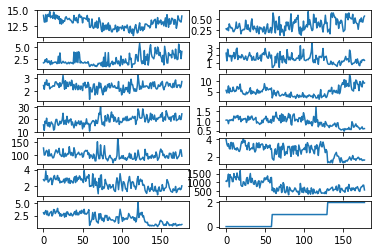

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

fig, axes = plt.subplots(7, 2)

for i,col in enumerate(data.columns):
  axes[i%7, i//7].plot(data[col],)

In [80]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

model = XGBClassifier()


SPLITS = 5
kf = KFold(n_splits = SPLITS)
n_iter = 0

features = data.iloc[:,:-1]
label = pd.DataFrame(data['label'])

score_list = []
for train_idx, test_idx in kf.split(features, label):
  n_iter += 1
  print(f'--------------------{n_iter}번째 KFold-------------------')
  print(f'train_idx_len : {len(train_idx)} / test_idx_len : {len(test_idx)}')

  label_train = label.iloc[train_idx]
  label_test = label.iloc[test_idx]

  X_train, X_test = features.iloc[train_idx, :], features.iloc[test_idx, :]
  y_train, y_test = label.iloc[train_idx,:], label.iloc[test_idx,:]

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  score = accuracy_score(y_test, preds)

  print(f'{n_iter}번째 단일 accuracy_score:{score}')
  score_list.append(score)


print('======================================================')
print(f'최종 평균 accuracy_socre : {sum(score_list)/len(score_list)}')

--------------------1번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
1번째 단일 accuracy_score:0.9166666666666666
--------------------2번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
2번째 단일 accuracy_score:0.9722222222222222
--------------------3번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
3번째 단일 accuracy_score:0.9444444444444444
--------------------4번째 KFold-------------------
train_idx_len : 143 / test_idx_len : 35
4번째 단일 accuracy_score:0.9714285714285714
--------------------5번째 KFold-------------------
train_idx_len : 143 / test_idx_len : 35
5번째 단일 accuracy_score:0.8571428571428571
최종 평균 accuracy_socre : 0.9323809523809523


## StratifiedKFold

In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

model = XGBClassifier()


SPLITS = 5
skf = StratifiedKFold(n_splits = SPLITS)
n_iter = 0

features = data.iloc[:,:-1]
label = pd.DataFrame(data['label'])

score_list = []
for train_idx, test_idx in skf.split(features, label):
  n_iter += 1
  print(f'--------------------{n_iter}번째 KFold-------------------')
  print(f'train_idx_len : {len(train_idx)} / test_idx_len : {len(test_idx)}')

  label_train = label.iloc[train_idx]
  label_test = label.iloc[test_idx]

  X_train, X_test = features.iloc[train_idx, :], features.iloc[test_idx, :]
  y_train, y_test = label.iloc[train_idx,:], label.iloc[test_idx,:]

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  score = accuracy_score(y_test, preds)

  print(f'{n_iter}번째 단일 accuracy_score:{score}')
  score_list.append(score)


print('======================================================')
print(f'최종 평균 accuracy_socre : {sum(score_list)/len(score_list)}')

--------------------1번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
1번째 단일 accuracy_score:0.9722222222222222
--------------------2번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
2번째 단일 accuracy_score:0.9166666666666666
--------------------3번째 KFold-------------------
train_idx_len : 142 / test_idx_len : 36
3번째 단일 accuracy_score:0.9444444444444444
--------------------4번째 KFold-------------------
train_idx_len : 143 / test_idx_len : 35
4번째 단일 accuracy_score:0.9714285714285714
--------------------5번째 KFold-------------------
train_idx_len : 143 / test_idx_len : 35
5번째 단일 accuracy_score:1.0
최종 평균 accuracy_socre : 0.9609523809523809


## Cross_val_score

In [91]:
from xgboost import XGBClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# 데이터 불러오기
np_data = load_wine()
wine_data = np_data.data
wine_label = np_data.target

data = pd.DataFrame(data = wine_data, columns = np_data.feature_names,)
data['label'] = np_data.target

features = data.iloc[:,:-1]
label = pd.DataFrame(data['label'])

# 모델 선언
model = XGBClassifier()

score = cross_val_score(model, features, label, scoring = 'accuracy', cv=10)
print(f"단일 accuracy : {score}")
print(f"5번의 fold 후 평균 accuracy: {np.mean(score)}")
print(score)

단일 accuracy : [0.94444444 1.         0.94444444 0.94444444 0.88888889 1.
 1.         0.94444444 1.         1.        ]
5번의 fold 후 평균 accuracy: 0.9666666666666666
[0.94444444 1.         0.94444444 0.94444444 0.88888889 1.
 1.         0.94444444 1.         1.        ]
